In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

/home/csverst/Github/CtDBenchmark/


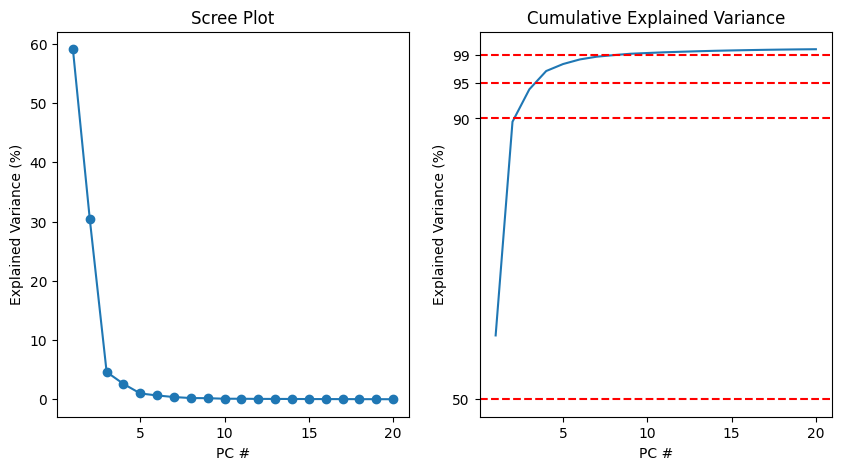

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240411_RandomTargetReach_GRU_Final/max_epochs=1500 latent_size=128 seed=0/'

an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
an_TT.plot_scree(max_pcs= 20)

# an_GRU = Analysis_DT(run_name = "GRU", filepath = pathGRU, model_type = "SAE")
# an_Vanilla = Analysis_DT(run_name = "Vanilla", filepath = pathVanilla, model_type = "SAE")
# an_NODE = Analysis_DT(run_name = "NODE", filepath = pathNODE, model_type = "SAE")
# an_LFADS = Analysis_DT(run_name = "LFADS", filepath = pathLFADS, model_type = "LFADS")

path_GRU_Sweep = pathTT + "20240412_Fig1_RandomTarget_GRU_DT_WeightDecay_sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240412_Fig1_RandomTarget_VanillaRNN_DT_WeightDecay_sweep/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240412_Fig1_RandomTarget_NODE_DT_Seeds/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240412_Fig1_RandomTarget_LFADS_DT_Seeds/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

In [3]:
comparison = Comparison(comparison_tag="Figure1RTR")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
# comparison.load_analysis(an_GRU, group = "GRU")
# comparison.load_analysis(an_Vanilla, group = "Vanilla")
# comparison.load_analysis(an_NODE, group = "NODE")
# comparison.load_analysis(an_LFADS, group = "LFADS")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:
        
        subfolder = subfolder + "/"
        analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
        comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 21
Working on 2 of 21
Working on 3 of 21
Working on 4 of 21
Working on 5 of 21
Working on 6 of 21
Working on 7 of 21
Working on 8 of 21
Working on 9 of 21
Working on 10 of 21
Working on 11 of 21
Working on 12 of 21
Working on 13 of 21
Working on 14 of 21
Working on 15 of 21
Working on 16 of 21
Working on 17 of 21
Working on 18 of 21
Working on 19 of 21
Working on 20 of 21
Working on 21 of 21


array([[0.98116125, 0.99197063],
       [0.98153704, 0.99250376],
       [0.98079201, 0.99177105],
       [0.98061495, 0.99246119],
       [0.98119786, 0.9918863 ],
       [0.99353868, 0.99722568],
       [0.99377583, 0.99722522],
       [0.99339933, 0.99711061],
       [0.99356766, 0.99710909],
       [0.99364846, 0.99714816],
       [0.98910364, 0.98361397],
       [0.98994201, 0.98427679],
       [0.98921868, 0.9838846 ],
       [0.98994619, 0.9845183 ],
       [0.98952887, 0.98400601],
       [0.        , 0.        ],
       [0.98701388, 0.99397869],
       [0.98939222, 0.99451111],
       [0.98827933, 0.99417886],
       [0.98771834, 0.9942223 ],
       [0.98952278, 0.99414253]])

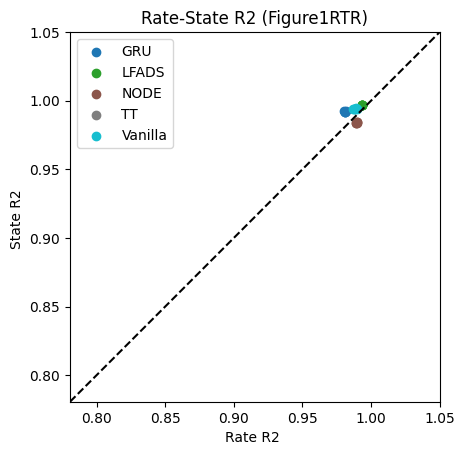

In [4]:
# comparison.compare_performance()
# comparison.compare_CCA(num_components=5)
comparison.compare_state_rate_r2()

In [5]:
# sims = comparison.compare_dynamics_DSA()


In [6]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine